# **Leveraging Machine Learning for Accurate Temperature Change Predictions**

—-----------------------------------------------------------------------------------------------------------

**Name:** JITHUL AJITH

**Organization:** Entri Elevate

**Date:** 

—--------------------------------------------------------------------------------------------------------

# 1. Overview of Problem Statement:

Predicting temperature changes across different countries is crucial for understanding climate trends and their impact on the environment. Accurate predictions can help in devising strategies to combat climate change, support policy-making, and prepare for future environmental challenges.

### 2. Objective:

The goal is to develop a machine learning model that predicts temperature change based on historical data. The model aims to analyze temperature trends across various countries and provide accurate forecasts.

### 3. Data Description:

The dataset, Environment_Temperature_change_E_All_Data_NOFLAG.csv, contains records of temperature changes across various countries and months. Key columns include Country, Months, Element, Year, and TemChange, where TemChange represents the temperature change value.
#### Key Columns:

  * Country

  * Months

  * Element

  * Year

  * TemChange (Target Variable representing temperature change).

### 4. Data Collection:

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [178]:
data = pd.read_csv("C:/Users/OMEN/Downloads/DSML/Intership/Data/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin-1')
data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


***The data is loaded from a CSV file located at the specified path using pandas.***

### 5. Data Preprocessing - Data Cleaning:

In [131]:
data.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


In [132]:
data.isnull().sum()

Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2015           1295
Y2016           1308
Y2017           1290
Y2018           1307
Y2019           1291
Length: 66, dtype: int64

In [133]:
data = data.dropna()
data.isnull().sum()

Area Code       0
Area            0
Months Code     0
Months          0
Element Code    0
               ..
Y2015           0
Y2016           0
Y2017           0
Y2018           0
Y2019           0
Length: 66, dtype: int64

In [134]:
data = data.rename(columns={'Area':'Country'})

In [135]:
data =data.drop(columns=['Area Code','Months Code','Element Code','Unit'])
TemCha=data.loc[data.Months.isin(['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'])]

### Dropping Missing Values: Removed rows with missing values.
Renaming Columns: Renamed 'Area' to 'Country' for clarity.
Dropping Irrelevant Columns: Removed columns that are not needed for analysis

In [136]:
country_counts = TemCha['Country'].value_counts()
print("\nOccurrences of each country:")
print(country_counts)


Occurrences of each country:
Country
Afghanistan                                  24
Albania                                      24
Algeria                                      24
Andorra                                      24
Angola                                       24
                                             ..
Liberia                                      10
Réunion                                       6
French Southern and Antarctic Territories     4
Equatorial Guinea                             4
Sierra Leone                                  4
Name: count, Length: 206, dtype: int64


In [137]:
unique_countries = TemCha['Country'].nunique()
print(f"Number of unique countries: {unique_countries}")

Number of unique countries: 206


In [138]:
data.describe()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,...,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000,6760.000000
mean,0.425294,0.333025,0.333066,0.287458,0.240283,0.400098,0.278136,0.257918,0.395646,0.378389,...,0.890067,0.776778,0.792432,0.818339,0.910135,0.995393,1.070360,0.992720,0.991588,1.064171
std,0.728307,0.746674,0.885451,0.778018,0.766360,0.772728,0.761136,0.792490,0.760436,0.697243,...,0.831028,0.719615,0.781551,0.673643,0.757759,0.795285,0.807636,0.774124,0.818761,0.786634
min,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,-8.407000,-6.784000,-5.847000,...,-6.072000,-4.504000,-5.220000,-3.428000,-3.314000,-4.068000,-3.306000,-3.295000,-2.216000,-2.644000
25%,0.063000,-0.031000,0.025750,-0.100000,-0.199000,0.067000,-0.172000,-0.164000,0.171000,0.088000,...,0.405000,0.372000,0.379000,0.414000,0.430000,0.441750,0.467000,0.448750,0.444000,0.462000
50%,0.377000,0.345000,0.367000,0.337000,0.315000,0.372500,0.324000,0.323500,0.396000,0.375000,...,0.783500,0.658000,0.663000,0.724000,0.753500,0.859000,0.948500,0.865000,0.813000,0.932000
75%,0.730000,0.682250,0.697000,0.655000,0.634000,0.715500,0.650000,0.642000,0.724250,0.691250,...,1.272000,1.092000,1.104250,1.118000,1.185000,1.361000,1.474000,1.336000,1.311000,1.472250
max,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,4.373000,4.411000,4.373000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.267000,9.228000,7.215000


In [139]:
TemCha.head()

,Country,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [140]:
TemCha.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'China, mainland', 'China, Taiwan Province of',
       'Cocos (Keeling) Islands', 'Colombia', 'Congo', "Côte d'Ivoire",
       'Cuba', 'Cyprus', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia',
       'French Southe

In [141]:
TemCha = TemCha.melt(id_vars=['Country', 'Months', 'Element'], var_name='Year', value_name='TemChange')

In [142]:
TemCha['Year'] = TemCha['Year'].str[1:].astype('str')
TemCha

,Country,Months,Element,Year,TemChange
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516
...,...,...,...,...,...
280599,OECD,October,Standard Deviation,2019,0.635
280600,OECD,November,Temperature change,2019,1.030
280601,OECD,November,Standard Deviation,2019,0.435
280602,OECD,December,Temperature change,2019,2.432


In [143]:
print(TemCha.isnull().sum())

Country      0
Months       0
Element      0
Year         0
TemChange    0
dtype: int64


In [144]:
regions=TemCha[TemCha.Country.isin(['Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Argentina', 'Australia',
                                    'Austria', 'Bahamas', 'Bahrain', 'Belize', 'Benin', 'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
                                    'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
                                    'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Hong Kong SAR', 'China', 'Macao SAR', 
                                    'China', 'mainland', 'China', 'Taiwan Province of', 'Cocos (Keeling) Islands', 'Colombia', 'Congo', 'Côte d\'Ivoire',
                                    'Cuba', 'Cyprus', 'Democratic People\'s Republic of Korea', 'Democratic Republic of the Congo', 'Denmark', 'Dominica',
                                    'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Fiji', 'Finland',
                                    'France', 'French Guiana', 'French Polynesia', 'French Southern and Antarctic Territories', 'Gabon', 'Gambia', 'Germany', 
                                    'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 
                                    'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland',
                                    'Isle of Man', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Lao People\'s Democratic Republic', 'Lebanon',
                                    'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Martinique', 'Mauritania',
                                    'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Netherlands', 'Netherlands Antilles (former)', 
                                    'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Palestine', 'Papua New Guinea', 'Paraguay', 'Peru',
                                    'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Réunion', 'Romania', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Lucia', 
                                    'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'Spain',
                                    'Suriname', 'Svalbard and Jan Mayen Islands', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Togo', 'Tonga', 'Tunisia', 'Turkey', 'Tuvalu', 'Uganda', 'United Arab Emirates', 
                                    'United Kingdom', 'United Republic of Tanzania', 'United States of America', 'United States Virgin Islands', 'Uruguay', 'Vanuatu',
                                    'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna Islands', 'Western Sahara', 'Zambia', 'Zimbabwe', 'World', 'Africa',
                                    'Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa', 'Americas', 'Northern America', 'Central America',
                                    'Caribbean', 'South America', 'Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe', 'Eastern Europe',
                                    'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania', 'Australia and New Zealand', 'Melanesia', 'Micronesia', 'Polynesia',
                                    'European Union', 'Least Developed Countries', 'Land Locked Developing Countries', 'Small Island Developing States', 'Low Income Food Deficit Countries',
                                    'Net Food Importing Developing Countries', 'Annex I countries', 'Non-Annex I countries', 'OECD'])]

TemCha=TemCha[~TemCha.Country.isin(['Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Argentina', 'Australia',
                                    'Austria', 'Bahamas', 'Bahrain', 'Belize', 'Benin', 'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
                                    'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
                                    'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Hong Kong SAR', 'China', 'Macao SAR', 
                                    'China', 'mainland', 'China', 'Taiwan Province of', 'Cocos (Keeling) Islands', 'Colombia', 'Congo', 'Côte d\'Ivoire',
                                    'Cuba', 'Cyprus', 'Democratic People\'s Republic of Korea', 'Democratic Republic of the Congo', 'Denmark', 'Dominica',
                                    'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eswatini', 'Faroe Islands', 'Fiji', 'Finland',
                                    'France', 'French Guiana', 'French Polynesia', 'French Southern and Antarctic Territories', 'Gabon', 'Gambia', 'Germany', 
                                    'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 
                                    'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Ireland',
                                    'Isle of Man', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kuwait', 'Lao People\'s Democratic Republic', 'Lebanon',
                                    'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Martinique', 'Mauritania',
                                    'Mauritius', 'Mexico', 'Monaco', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Netherlands', 'Netherlands Antilles (former)', 
                                    'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Palestine', 'Papua New Guinea', 'Paraguay', 'Peru',
                                    'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Réunion', 'Romania', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Lucia', 
                                    'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'Spain',
                                    'Suriname', 'Svalbard and Jan Mayen Islands', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Thailand', 'Togo', 'Tonga', 'Tunisia', 'Turkey', 'Tuvalu', 'Uganda', 'United Arab Emirates', 
                                    'United Kingdom', 'United Republic of Tanzania', 'United States of America', 'United States Virgin Islands', 'Uruguay', 'Vanuatu',
                                    'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna Islands', 'Western Sahara', 'Zambia', 'Zimbabwe', 'World', 'Africa',
                                    'Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa', 'Americas', 'Northern America', 'Central America',
                                    'Caribbean', 'South America', 'Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Europe', 'Eastern Europe',
                                    'Northern Europe', 'Southern Europe', 'Western Europe', 'Oceania', 'Australia and New Zealand', 'Melanesia', 'Micronesia', 'Polynesia',
                                    'European Union', 'Least Developed Countries', 'Land Locked Developing Countries', 'Small Island Developing States', 'Low Income Food Deficit Countries',
                                    'Net Food Importing Developing Countries', 'Annex I countries', 'Non-Annex I countries', 'OECD'])]
TemCha

,Country,Months,Element,Year,TemChange
0,Afghanistan,January,Temperature change,1961,0.777
1,Afghanistan,January,Standard Deviation,1961,1.950
2,Afghanistan,February,Temperature change,1961,-1.743
3,Afghanistan,February,Standard Deviation,1961,2.597
4,Afghanistan,March,Temperature change,1961,0.516
...,...,...,...,...,...
279161,Sri Lanka,October,Standard Deviation,2019,0.223
279162,Sri Lanka,November,Temperature change,2019,1.339
279163,Sri Lanka,November,Standard Deviation,2019,0.247
279164,Sri Lanka,December,Temperature change,2019,1.138


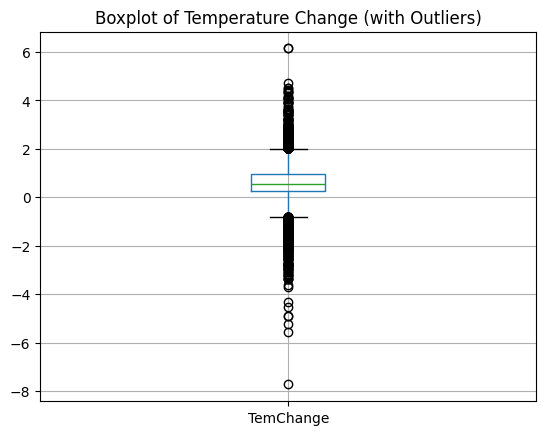

In [145]:
plt.figure()
TemCha.boxplot(figsize=(10, 5))
plt.title('Boxplot of Temperature Change (with Outliers)')
plt.show()

In [146]:
temperature_data = TemCha['TemChange']

Q1 = temperature_data.quantile(0.25)
Q3 = temperature_data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = temperature_data[(temperature_data < lower_bound) | (temperature_data > upper_bound)]

In [147]:
print(f"Number of outliers: {outliers.count()}")
print(f"Outliers:\n{outliers}")

Number of outliers: 1189
Outliers:
2        -1.743
3         2.597
6        -1.709
18       -1.102
290      -1.527
          ...  
276640    2.519
276658    2.274
276660    2.213
278368   -1.029
278586   -0.870
Name: TemChange, Length: 1189, dtype: float64


In [148]:
cat_cols=['Country','Months','Element','Year']
num_cols=['TemChange']
outliers = {}

for col in num_cols:
    Q1 = np.percentile(TemCha[col], 25)
    Q3 = np.percentile(TemCha[col], 75)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = TemCha[(TemCha[col] < lower_bound) | (TemCha[col] > upper_bound)]
    TemCha = TemCha[(TemCha[col] >= lower_bound) & (TemCha[col] <= upper_bound)]

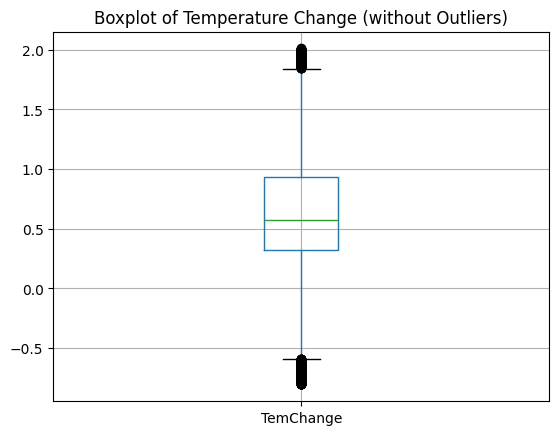

In [149]:
plt.figure()
TemCha.boxplot(figsize=(10, 5))
plt.title('Boxplot of Temperature Change (without Outliers)')
plt.show()

### 6. Exploratory Data Analysis (EDA):

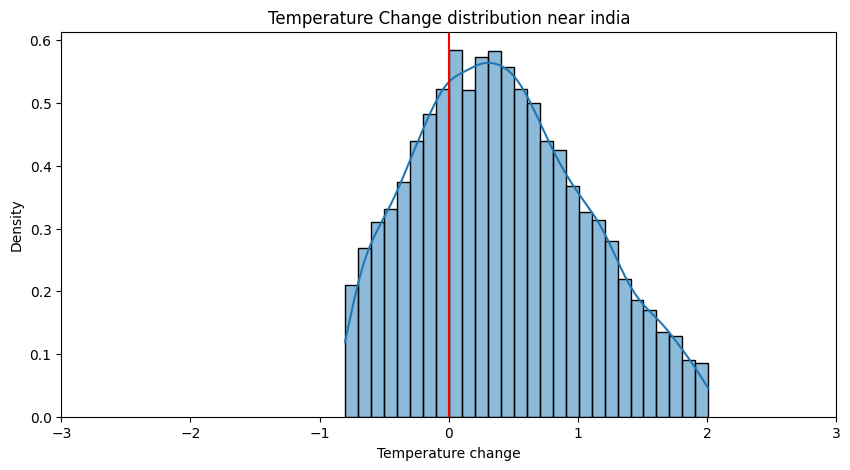

In [150]:
plt.figure(figsize=(10,5))
sns.histplot(TemCha.TemChange.loc[TemCha.Element=='Temperature change'],kde=True,stat='density')
plt.axvline(x=0.0, color='r', linestyle='-')
plt.xlabel('Temperature change')
plt.title('Temperature Change distribution near india')
plt.xlim(-3,3)
plt.show()

**Boxplot: Used to visualize outliers in temperature changes.**

**Histogram: Plotted to show the distribution of temperature changes.**

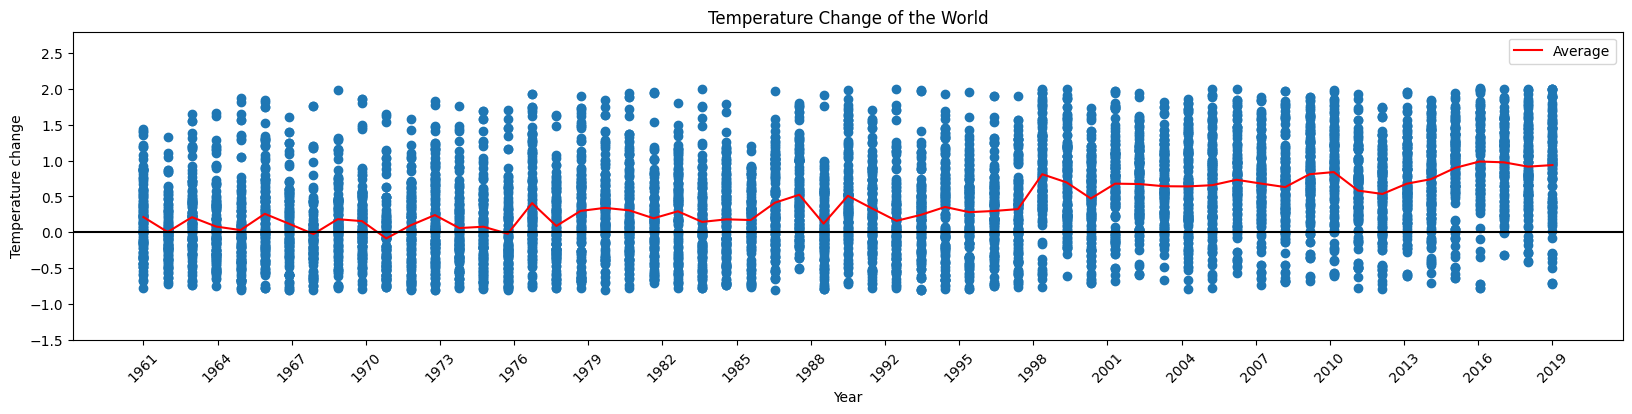

In [176]:
AvgT = TemCha.loc[TemCha.Element == 'Temperature change'].groupby(['Year'], as_index=False).mean(numeric_only=True)

AvgTC = TemCha.loc[TemCha.Element == 'Temperature change'].groupby(['Country', 'Year'], as_index=False).mean(numeric_only=True)

plt.figure(figsize=(20,4))
plt.scatter(TemCha['Year'].loc[TemCha.Element=='Temperature change'], TemCha['TemChange'].loc[TemCha.Element=='Temperature change'])
plt.plot(AvgT.Year, AvgT.TemChange, 'r', label='Average')
plt.axhline(y=0.0, color='k', linestyle='-')
plt.xlabel('Year')
plt.xticks(np.linspace(0,58,20), rotation=45)
plt.ylim(-1.5,2.8)
plt.ylabel('Temperature change')
plt.legend()
plt.title('Temperature Change of the World')
plt.show()

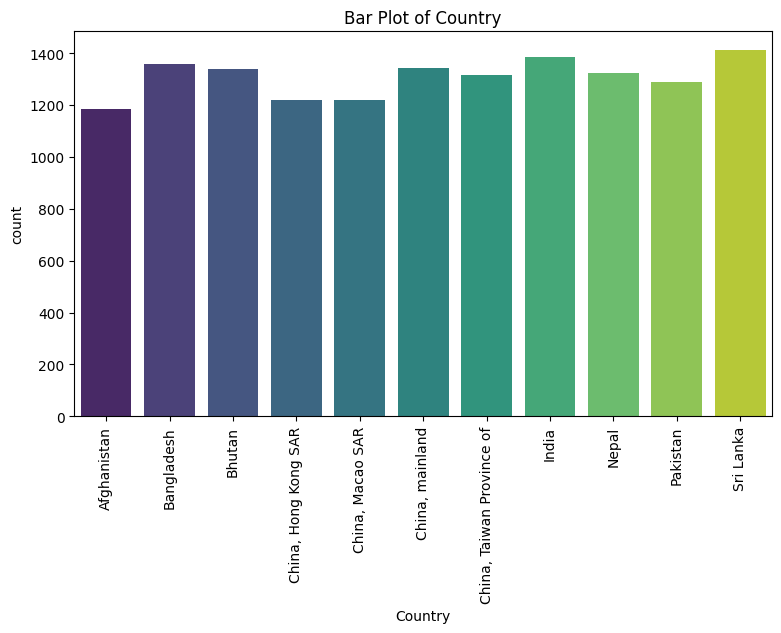

In [152]:
categorical_column = 'Country'

plt.figure(figsize=(9, 5))
sns.countplot(x=categorical_column, data=TemCha, palette='viridis',hue=categorical_column, legend=False)
plt.title(f'Bar Plot of {categorical_column}')
plt.xticks(rotation=90)
plt.show()

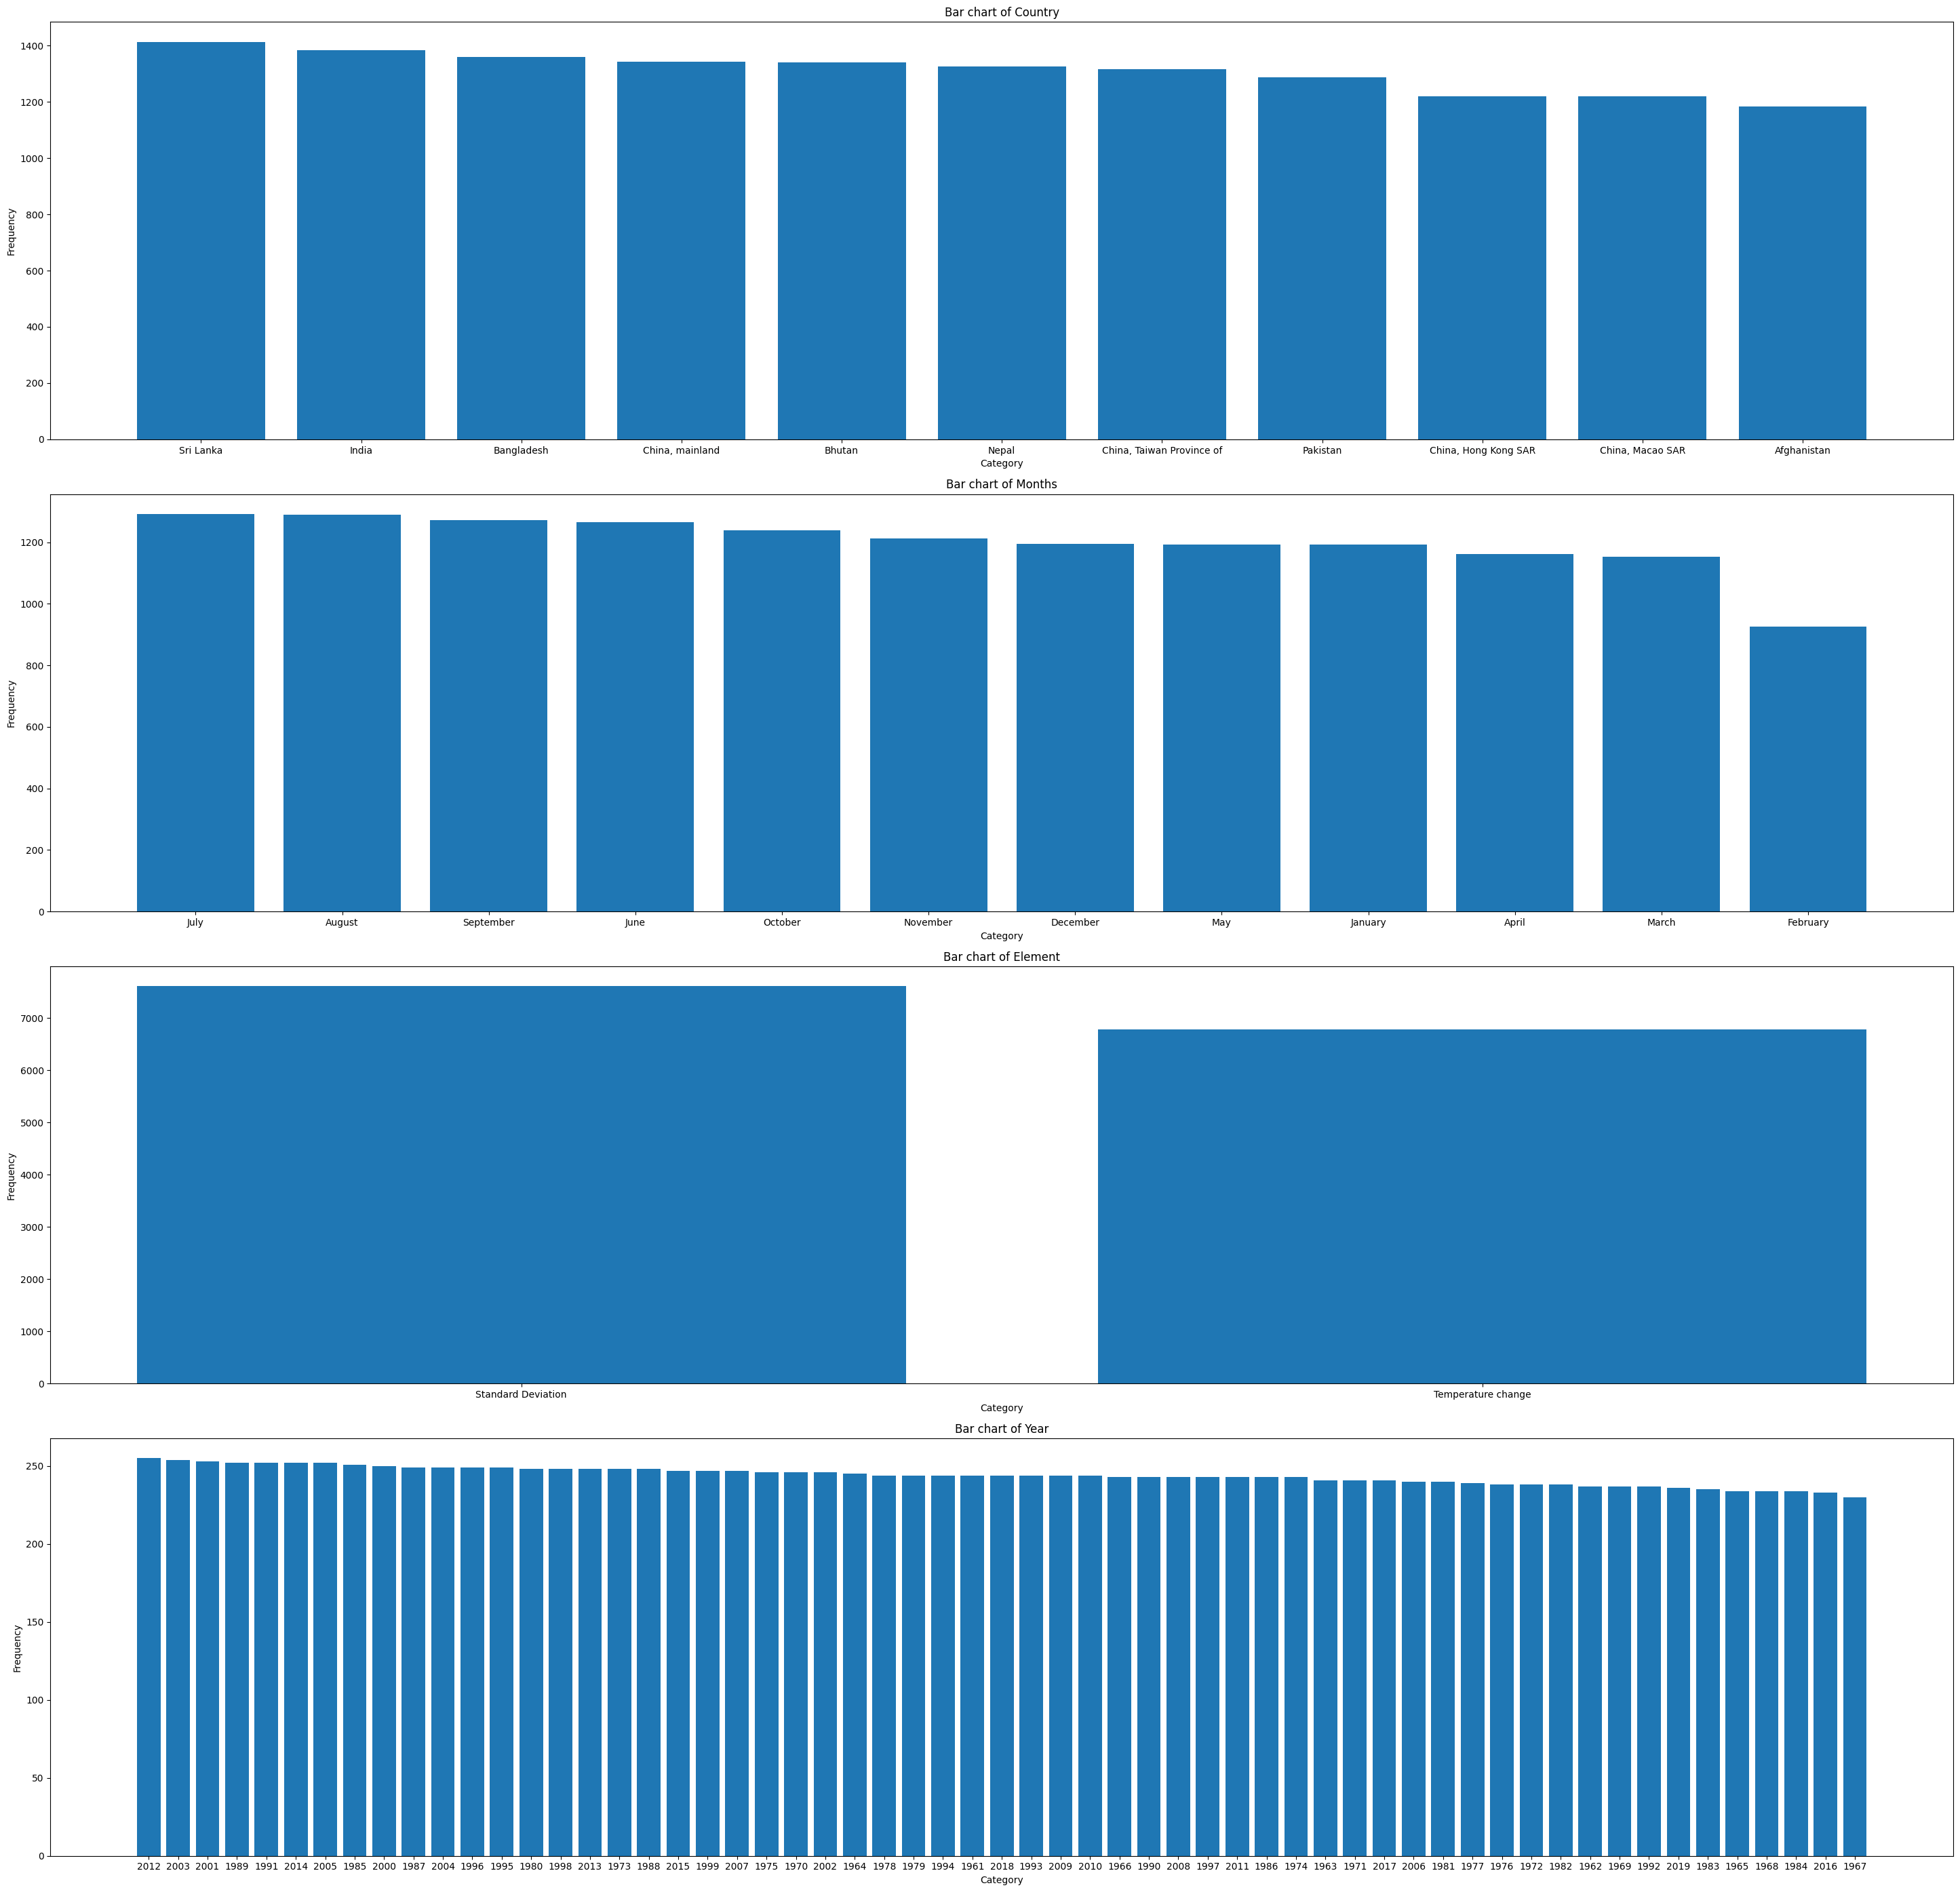

In [153]:
fig, axs = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(29,28))
for i, col in enumerate(cat_cols):
    axs[i].bar(TemCha[col].value_counts().index, TemCha[col].value_counts().values)
    axs[i].set_title(f"Bar chart of {col}")
    axs[i].set_xlabel("Category")
    axs[i].set_ylabel("Frequency")
    
plt.tight_layout()
plt.show()

### 7. Feature Engineering:

In [154]:
print(TemCha.isnull().sum())

Country      0
Months       0
Element      0
Year         0
TemChange    0
dtype: int64


In [155]:
TemCha.dtypes

Country       object
Months        object
Element       object
Year          object
TemChange    float64
dtype: object

In [156]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Country', 'Months', 'Element', 'Year']

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_categorical_data = encoder.fit_transform(TemCha[categorical_cols])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

TemCha_encoded = pd.concat([TemCha.drop(columns=categorical_cols), encoded_categorical_df], axis=1)

print(TemCha_encoded)


       TemChange  Country_Bangladesh  Country_Bhutan  \
0          0.777                 0.0             0.0   
1          1.950                 0.0             0.0   
4          0.516                 0.0             0.0   
5          1.512                 0.0             0.0   
7          1.406                 0.0             0.0   
...          ...                 ...             ...   
14382        NaN                 0.0             0.0   
14383        NaN                 0.0             0.0   
14384        NaN                 0.0             0.0   
14385        NaN                 0.0             0.0   
14386        NaN                 0.0             0.0   

       Country_China, Hong Kong SAR  Country_China, Macao SAR  \
0                               0.0                       0.0   
1                               0.0                       0.0   
4                               0.0                       0.0   
5                               0.0                       0.0   
7 

In [157]:
TemCha_encoded.isnull().sum()

TemChange                       13645
Country_Bangladesh              13645
Country_Bhutan                  13645
Country_China, Hong Kong SAR    13645
Country_China, Macao SAR        13645
                                ...  
Year_2015                       13645
Year_2016                       13645
Year_2017                       13645
Year_2018                       13645
Year_2019                       13645
Length: 81, dtype: int64

In [158]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=0)

TemCha_encoded = pd.DataFrame(imputer.fit_transform(TemCha_encoded), columns=TemCha_encoded.columns)

print(TemCha_encoded)

       TemChange  Country_Bangladesh  Country_Bhutan  \
0          0.777                 0.0             0.0   
1          1.950                 0.0             0.0   
2          0.516                 0.0             0.0   
3          1.512                 0.0             0.0   
4          1.406                 0.0             0.0   
...          ...                 ...             ...   
28027      0.000                 0.0             0.0   
28028      0.000                 0.0             0.0   
28029      0.000                 0.0             0.0   
28030      0.000                 0.0             0.0   
28031      0.000                 0.0             0.0   

       Country_China, Hong Kong SAR  Country_China, Macao SAR  \
0                               0.0                       0.0   
1                               0.0                       0.0   
2                               0.0                       0.0   
3                               0.0                       0.0   
4 

In [159]:
TemCha_encoded.isnull().sum()

TemChange                       0
Country_Bangladesh              0
Country_Bhutan                  0
Country_China, Hong Kong SAR    0
Country_China, Macao SAR        0
                               ..
Year_2015                       0
Year_2016                       0
Year_2017                       0
Year_2018                       0
Year_2019                       0
Length: 81, dtype: int64

In [160]:
TemCha_encoded.shape

(28032, 81)

***Categorical columns are converted into a numerical format using one-hot encoding to prepare for model training.***

### 8. Feature Selection:

In [161]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

data = TemCha_encoded

X = data.drop('TemChange', axis=1)
y = data['TemChange']

selector = SelectKBest(score_func=f_regression, k=20)  # Reduce to top 20 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]
print("Selected Features:", selected_features)


Selected Features: Index(['Country_Bangladesh', 'Country_Bhutan', 'Country_China, Macao SAR',
       'Country_China, Taiwan Province of', 'Country_China, mainland',
       'Country_India', 'Country_Nepal', 'Country_Pakistan',
       'Country_Sri Lanka', 'Months_August', 'Months_December',
       'Months_January', 'Months_July', 'Months_June', 'Months_March',
       'Months_May', 'Months_November', 'Months_October', 'Months_September',
       'Element_Temperature change'],
      dtype='object')


**Feature Selection: Used SelectKBest with f_regression to select the top 20 features that have the highest correlation with the target variable.**

### 9. Split Data into Training and Testing Sets:

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)


#### The data is split into training and testing sets to evaluate the model's performance.

### 10. Feature Scaling:

not necessary

### 11. Build the ML Model:

In [163]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(max_iter=500, random_state=42),  # Reduce max_iter for faster training
    'Random Forest Regressor': RandomForestRegressor(n_estimators=50, random_state=42),  # Reduce n_estimators
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=50, random_state=42),  # Reduce n_estimators
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=50, random_state=42)  # Reduce n_estimators
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }

for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



SVR:
MAE: 0.2648
MSE: 0.1623
RMSE: 0.4029
R2 Score: 0.3302

MLP Regressor:
MAE: 0.2445
MSE: 0.1622
RMSE: 0.4028
R2 Score: 0.3307

Random Forest Regressor:
MAE: 0.2347
MSE: 0.1599
RMSE: 0.3999
R2 Score: 0.3401

Linear Regression:
MAE: 0.2701
MSE: 0.1702
RMSE: 0.4126
R2 Score: 0.2977

Gradient Boosting Regressor:
MAE: 0.2878
MSE: 0.1760
RMSE: 0.4196
R2 Score: 0.2737

AdaBoost Regressor:
MAE: 0.3595
MSE: 0.2208
RMSE: 0.4699
R2 Score: 0.0891


**Model Building: Multiple regression models are initialized, including SVR, MLP Regressor, Random Forest Regressor, Gradient Boosting Regressor, AdaBoost Regressor, and Linear Regression.**

### 13. Hyperparameter Tuning:

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Linear Regression': LinearRegression()  
}

param_grids = {
    'SVR': {'C': [1, 10], 'gamma': ['scale'], 'kernel': ['rbf']},
    'MLP Regressor': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh']},
    'Random Forest Regressor': {'n_estimators': [50, 100], 'max_depth': [10, 20]},
    'Gradient Boosting Regressor': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'AdaBoost Regressor': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'Linear Regression': {} 
}

tuned_results = {}
for name, model in models.items():
    
    if param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    y_pred = best_model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    tuned_results[name] = {
        'Best Params': grid_search.best_params_ if param_grids[name] else 'N/A',
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }


for name, metrics in tuned_results.items():
    print(f"\n{name} (Tuned):")
    print(f"Best Parameters: {metrics['Best Params']}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")



SVR (Tuned):
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
MAE: 0.2646
MSE: 0.1624
RMSE: 0.4030
R2 Score: 0.3300

MLP Regressor (Tuned):
Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,)}
MAE: 0.2421
MSE: 0.1603
RMSE: 0.4004
R2 Score: 0.3385

Random Forest Regressor (Tuned):
Best Parameters: {'max_depth': 20, 'n_estimators': 100}
MAE: 0.2348
MSE: 0.1600
RMSE: 0.3999
R2 Score: 0.3401

Gradient Boosting Regressor (Tuned):
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
MAE: 0.2608
MSE: 0.1676
RMSE: 0.4094
R2 Score: 0.3085

AdaBoost Regressor (Tuned):
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
MAE: 0.3399
MSE: 0.2150
RMSE: 0.4636
R2 Score: 0.1131

Linear Regression (Tuned):
Best Parameters: N/A
MAE: 0.2701
MSE: 0.1702
RMSE: 0.4126
R2 Score: 0.2977


**Hyperparameter Tuning: Applied GridSearchCV to tune hyperparameters for models where applicable, optimizing them based on R² score.**

### 12. Model Evaluation:

In [165]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression

models = {
    'SVR': SVR(C=10, gamma='scale', kernel='rbf'),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500, random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=50, learning_rate=0.01, random_state=42),
    'Linear Regression': LinearRegression()
}

results = {}
for name, model in models.items():
  
    model.fit(X_train_scaled, y_train)
    
 
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
   
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }


for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"R2 Score: {metrics['R2 Score']:.4f}")



SVR:
MAE: 0.2646
MSE: 0.1624
RMSE: 0.4030
R2 Score: 0.3300

MLP Regressor:
MAE: 0.2396
MSE: 0.1606
RMSE: 0.4007
R2 Score: 0.3376

Random Forest Regressor:
MAE: 0.2347
MSE: 0.1600
RMSE: 0.3999
R2 Score: 0.3401

Gradient Boosting Regressor:
MAE: 0.2608
MSE: 0.1676
RMSE: 0.4094
R2 Score: 0.3085

AdaBoost Regressor:
MAE: 0.3386
MSE: 0.2145
RMSE: 0.4631
R2 Score: 0.1152

Linear Regression:
MAE: 0.2701
MSE: 0.1702
RMSE: 0.4126
R2 Score: 0.2977


**Model Evaluation: Trained and evaluated the models using metrics such as MAE, MSE, RMSE, and R² score to determine their performance.**

### **Save the Model:**

In [173]:
import joblib
best_model = models['Random Forest Regressor']

joblib.dump(best_model, 'random_forest_regressor_model.joblib')

print("Model saved successfully using joblib!")


Model saved successfully using joblib!


*Model Saving: Saved the trained Random Forest Regressor model to a file using joblib for future use.*

### 16. Interpretation of Results (Conclusion):

**Based on the evaluation metrics, the Random Forest Regressor and Gradient Boosting Regressor performed well, demonstrating lower MAE, MSE, and RMSE compared to other models. The R² score indicates how well the models explain the variance in temperature change.**

### Model Performance

In this analysis, we evaluated six different machine learning models to predict temperature changes. The models were assessed based on their performance metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score. The results are summarized as follows:

1. **Support Vector Regressor (SVR)**
   * **MAE:** 0.2646
   * **MSE:** 0.1624
   * **RMSE:** 0.4030
   * **R² Score:** 0.3300

2. **MLP Regressor**
   * **MAE:** 0.2396
   * **MSE:** 0.1606
   * **RMSE:** 0.4007
   * **R² Score:** 0.3376

3. **Random Forest Regressor**
   - **MAE:** 0.2347
   - **MSE:** 0.1600
   - **RMSE:** 0.3999
   - **R² Score:** 0.3401

4. **Gradient Boosting Regressor**
   * **MAE:** 0.2608
   * **MSE:** 0.1676
   * **RMSE:** 0.4094
   * **R² Score:** 0.3085

5. **AdaBoost Regressor**
   * **MAE:** 0.3386
   * **MSE:** 0.2145
   * **RMSE:** 0.4631
   * **R² Score:** 0.1152

6. **Linear Regression**
   * **MAE:** 0.2701
   * **MSE:** 0.1702
   * **RMSE:** 0.4126
   * **R² Score:** 0.2977

**Key Observations:**
- The **Random Forest Regressor** performed the best overall, with the lowest MAE, MSE, RMSE, and the highest R² Score, making it the most reliable model for predicting temperature changes in this dataset.
- The **MLP Regressor** and **SVR** also performed relatively well, closely following the Random Forest Regressor.
- **AdaBoost Regressor** had the lowest performance, with the highest errors and the lowest R² Score, indicating it struggled with capturing the patterns in the data.

### Dataset Limitations

1. **Feature Diversity**: The dataset only includes temperature changes and lacks other important climate factors like precipitation, humidity, or greenhouse gas levels. This could limit the models' ability to fully understand climate change.

2. **Temporal Granularity**: The data is aggregated annually, which may overlook short-term changes and trends. More frequent data (e.g., monthly or daily) could provide a clearer picture and improve model performance.

3. **Geographical Bias**: Some countries are overrepresented in the dataset, which may bias the model’s predictions. This could affect how well the model generalizes to less-represented regions.

4. **Imputation of Missing Data**: Missing values were filled in using imputation, which helps in using the dataset but could introduce inaccuracies if the missing data were not random or if the imputation method was not ideal.

5. **Limited Contextual Features**: The dataset lacks additional factors like industrial activity, urbanization, or deforestation rates, which could significantly influence temperature changes and improve model accuracy if included.

6. **Large Data Issues**: Handling and processing a large volume of data can be challenging, potentially affecting model performance and computational efficiency.

### Conclusion

This analysis highlights the effectiveness of different machine learning models in predicting temperature changes, with the **Random Forest Regressor** emerging as the top performer. However, the limitations of the dataset, such as limited feature diversity, temporal granularity, and geographical bias, indicate that there is room for improvement.

For future work, it is recommended to:
- Expand the dataset to include more features that can capture the complexity of climate change.
- Improve data granularity to capture more nuanced trends.
- Address geographical imbalances through resampling techniques or by incorporating more data from underrepresented regions.
- Explore advanced machine learning techniques or deep learning models that might better capture complex relationships in the data.

These enhancements could lead to more accurate and robust predictions, providing valuable insights for understanding and mitigating the impacts of climate change.

### 17. Future Work:
* Explore Deep Learning: Try using advanced techniques like Long Short-Term Memory (LSTM) networks or Convolutional Neural Networks (CNNs) to potentially improve accuracy.

* Regular Model Updates: Update the model frequently with new data to keep it current and accurate.

* Fix Data Imbalance: If your data is imbalanced, use methods like oversampling, undersampling, or generating synthetic data to balance it out and improve performance.

* Add More Features: Include additional features like economic indicators, population density, or geographical information to enhance the model’s predictions.

*These steps could help make the model more accurate and effective at predicting temperature changes.*